# **Split the Data**

Train : 80
Test  : 20

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#load data
data = pd.read_csv('scaled_data.csv')

#split data into train and test sets
train, test = train_test_split(data, test_size=0.3)

#save data
train.to_csv('train_data.csv', index=False)
test.to_csv('test_data.csv', index=False)


# **SVR MODEL**

In [94]:
#fitting SVR into the dataset

from sklearn.svm import SVR

X_train = train.iloc[:,np.r_[0,2:15]]
y_train = train.iloc[:,1]
X_test = test.iloc[:,np.r_[0,2:15]]
y_test = test.iloc[:,1]

regressor = SVR(kernel = 'rbf')
regressor = SVR (kernel = 'linear')
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [103]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'epsilon': [0.01, 0.1, 1],
#     'gamma': ['scale', 'auto', 0.1, 1, 10]
# }

# grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

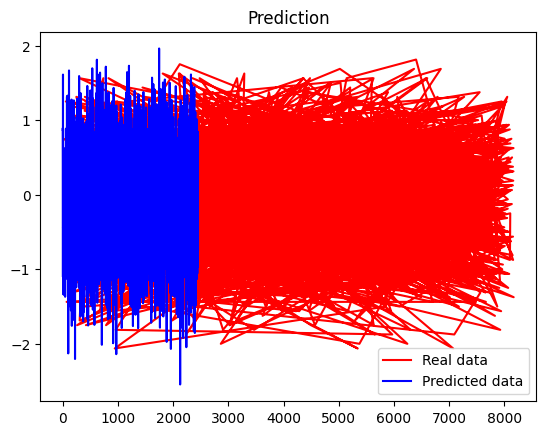

In [96]:
#plot the graph
import matplotlib.pyplot as plt
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()


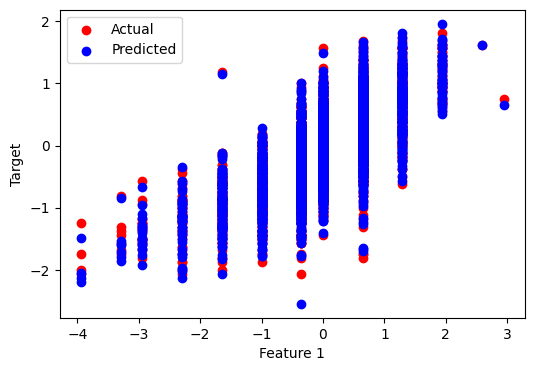

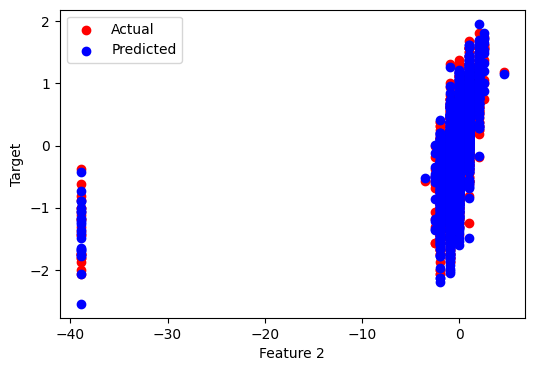

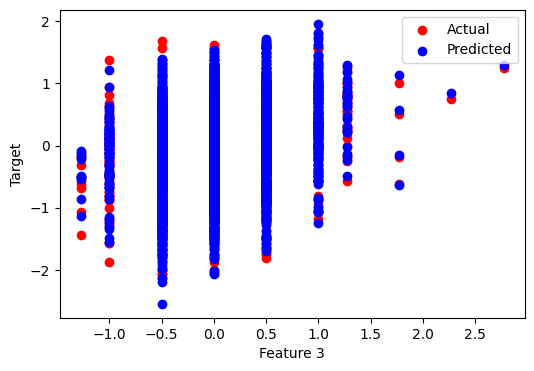

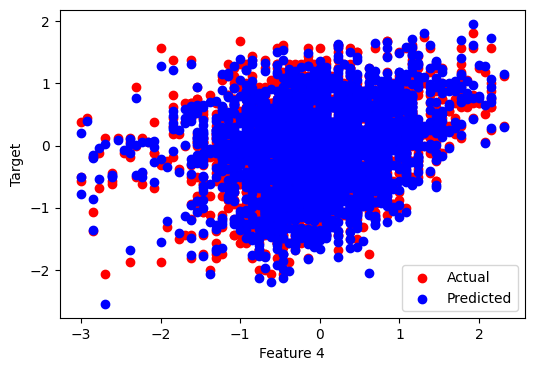

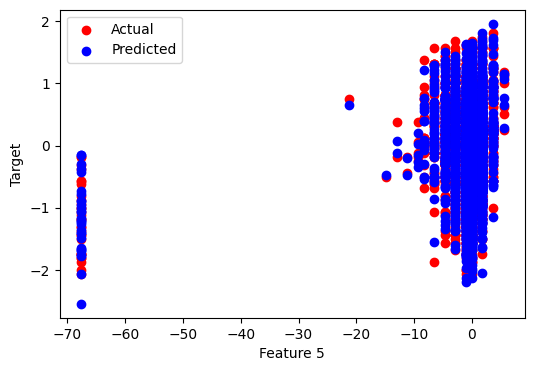

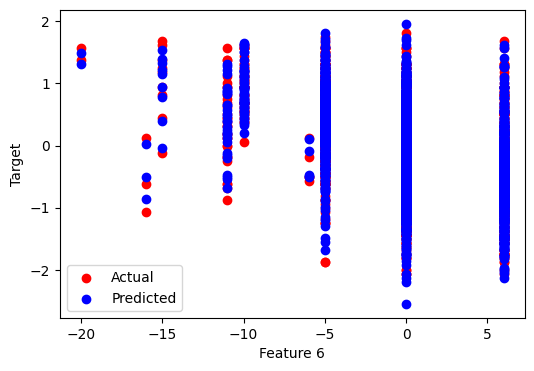

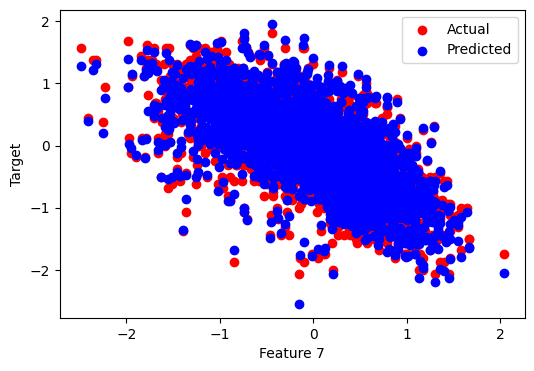

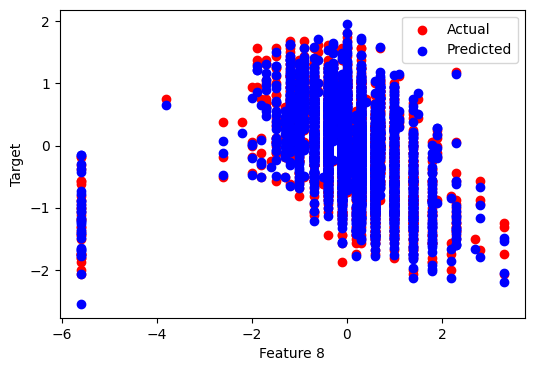

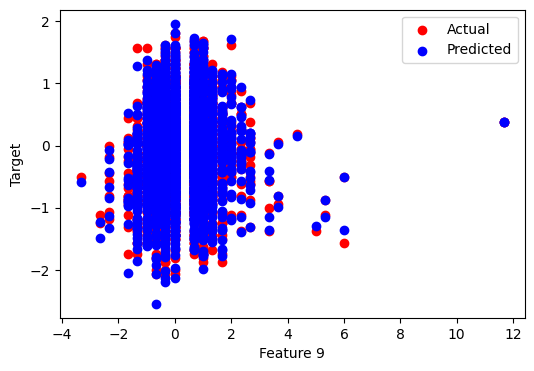

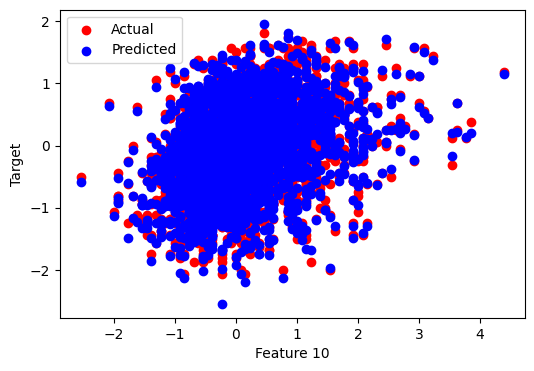

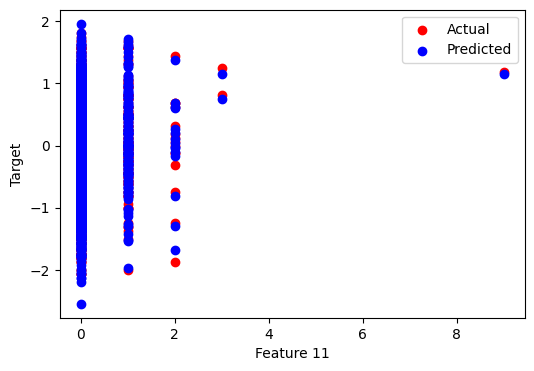

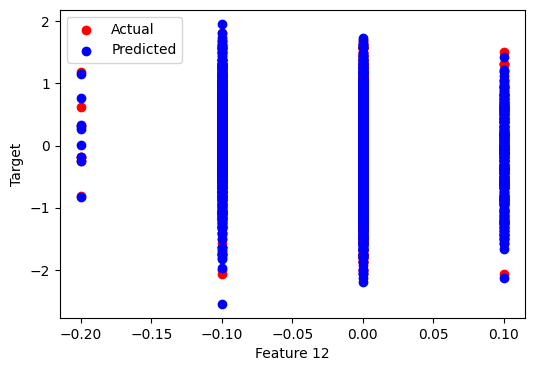

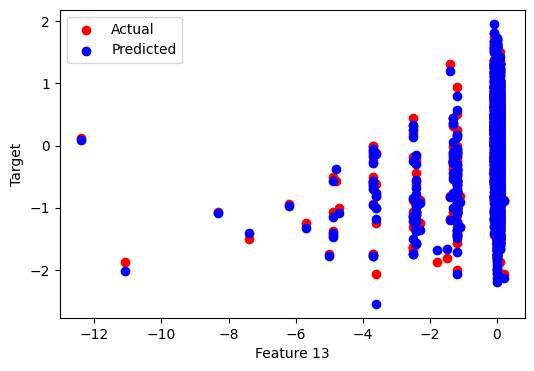

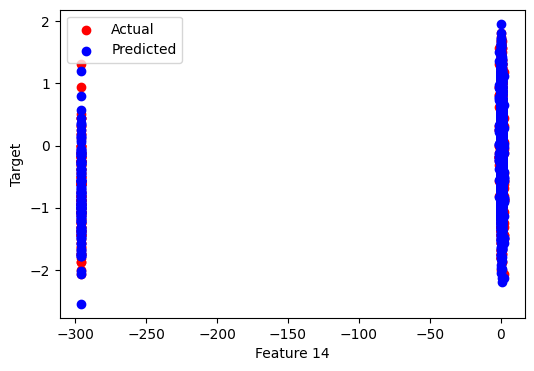

In [97]:
for i in range(X_test.shape[1]):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_test.iloc[:, i], y_test, color='red', label='Actual')
    plt.scatter(X_test.iloc[:, i], y_pred, color='blue', label='Predicted')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

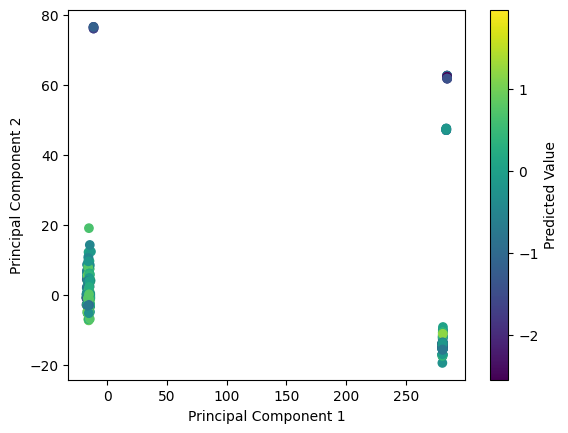

In [98]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of X_test to 2
pca = PCA(n_components=2)
X_test_reduced = pca.fit_transform(X_test)

# Plot the reduced data
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Predicted Value')
plt.show()

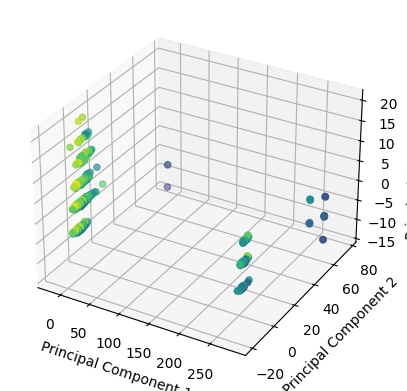

In [99]:
# Reduce the dimensionality of X_test to 5
pca = PCA(n_components=5)
X_test_reduced = pca.fit_transform(X_test)

# Plot the reduced data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], X_test_reduced[:, 2], c=y_pred)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# Evaluation

In [100]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_train, y_pred_train),
metrics.mean_squared_error (y_train, y_pred_train),
np.sqrt (metrics.mean_squared_error (y_train, y_pred_train)),
metrics.explained_variance_score (y_train, y_pred_train)]}).round(6)
print(metrics_df)

      Metric     Value
0        MAE  0.051890
1        MSE  0.004741
2       RMSE  0.068852
3  R-Squared  0.990911


In [101]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, y_pred),
metrics.mean_squared_error (y_test, y_pred),
np.sqrt (metrics.mean_squared_error (y_test, y_pred)),
metrics.explained_variance_score (y_test, y_pred)]}).round(6)
print(metrics_df)

      Metric     Value
0        MAE  0.051074
1        MSE  0.004576
2       RMSE  0.067648
3  R-Squared  0.990706


to check if overfitting occur we try to pred using y_train data and check the perfomance

The result is the model is not overfitting since the MAE,MSE,RMSE and R-squared are different value but are close to each other

In [102]:
from sklearn.model_selection import cross_val_score

# cross-validation
scores = cross_val_score(regressor, X_train, y_train, cv=5)

print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())


scores = cross_val_score(regressor, X_test, y_test, cv=5)

print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [0.99129398 0.99066826 0.99081885 0.9906012  0.99047873]
Average cross-validation score:  0.9907722041893134
Cross-validation scores:  [0.98950967 0.99020395 0.99157559 0.99209602 0.98968579]
Average cross-validation score:  0.9906142052628029


to check further , we check by using cross-validation : the result is good as both test and train data is accurate . The test data is less accurate because the test data is fewer than train

## When using different kernel

By using rbf , the data is accurate and not overfitting
By using linear , the data seem overfitting
By using poly and sigmoid, the data is not occurate at all